In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [91]:
df = pd.read_csv('bodyfat-comp.csv')
df.head()

,Id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,Person2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
1,Person3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
2,Person4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
3,Person6,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
4,Person7,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,168.0,1.055817,0.018204,0.995,1.04155,1.0549,1.071,1.0926
BodyFat,168.0,18.994048,8.098242,3.000,12.17500,19.2000,25.225,47.5000
Age,168.0,44.720238,12.691610,22.000,35.00000,43.0000,54.000,72.0000
Weight,168.0,177.323214,25.441979,127.500,159.00000,174.1250,195.250,244.2500
Height,168.0,70.053571,4.061756,29.500,68.25000,70.0000,72.250,77.5000
Neck,168.0,37.961310,2.192801,31.100,36.40000,37.9000,39.325,43.9000
Chest,168.0,100.194643,7.666736,83.400,93.82500,99.5500,104.750,121.6000
Abdomen,168.0,91.944048,9.747560,70.400,84.25000,90.8000,98.875,122.1000
Hip,168.0,99.618452,6.176463,85.300,95.57500,99.1500,103.125,115.5000
Thigh,168.0,59.279167,4.688064,49.300,56.07500,58.9000,62.200,72.9000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       168 non-null    object 
 1   Density  168 non-null    float64
 2   BodyFat  168 non-null    float64
 3   Age      168 non-null    int64  
 4   Weight   168 non-null    float64
 5   Height   168 non-null    float64
 6   Neck     168 non-null    float64
 7   Chest    168 non-null    float64
 8   Abdomen  168 non-null    float64
 9   Hip      168 non-null    float64
 10  Thigh    168 non-null    float64
 11  Knee     168 non-null    float64
 12  Ankle    168 non-null    float64
 13  Biceps   168 non-null    float64
 14  Forearm  168 non-null    float64
 15  Wrist    168 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 21.1+ KB


In [94]:
df.isnull().sum()

Id         0
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df['BodyFat'].describe().T

count    168.000000
mean      18.994048
std        8.098242
min        3.000000
25%       12.175000
50%       19.200000
75%       25.225000
max       47.500000
Name: BodyFat, dtype: float64

In [97]:
df = df.drop(['Id','Density'], axis=1,)

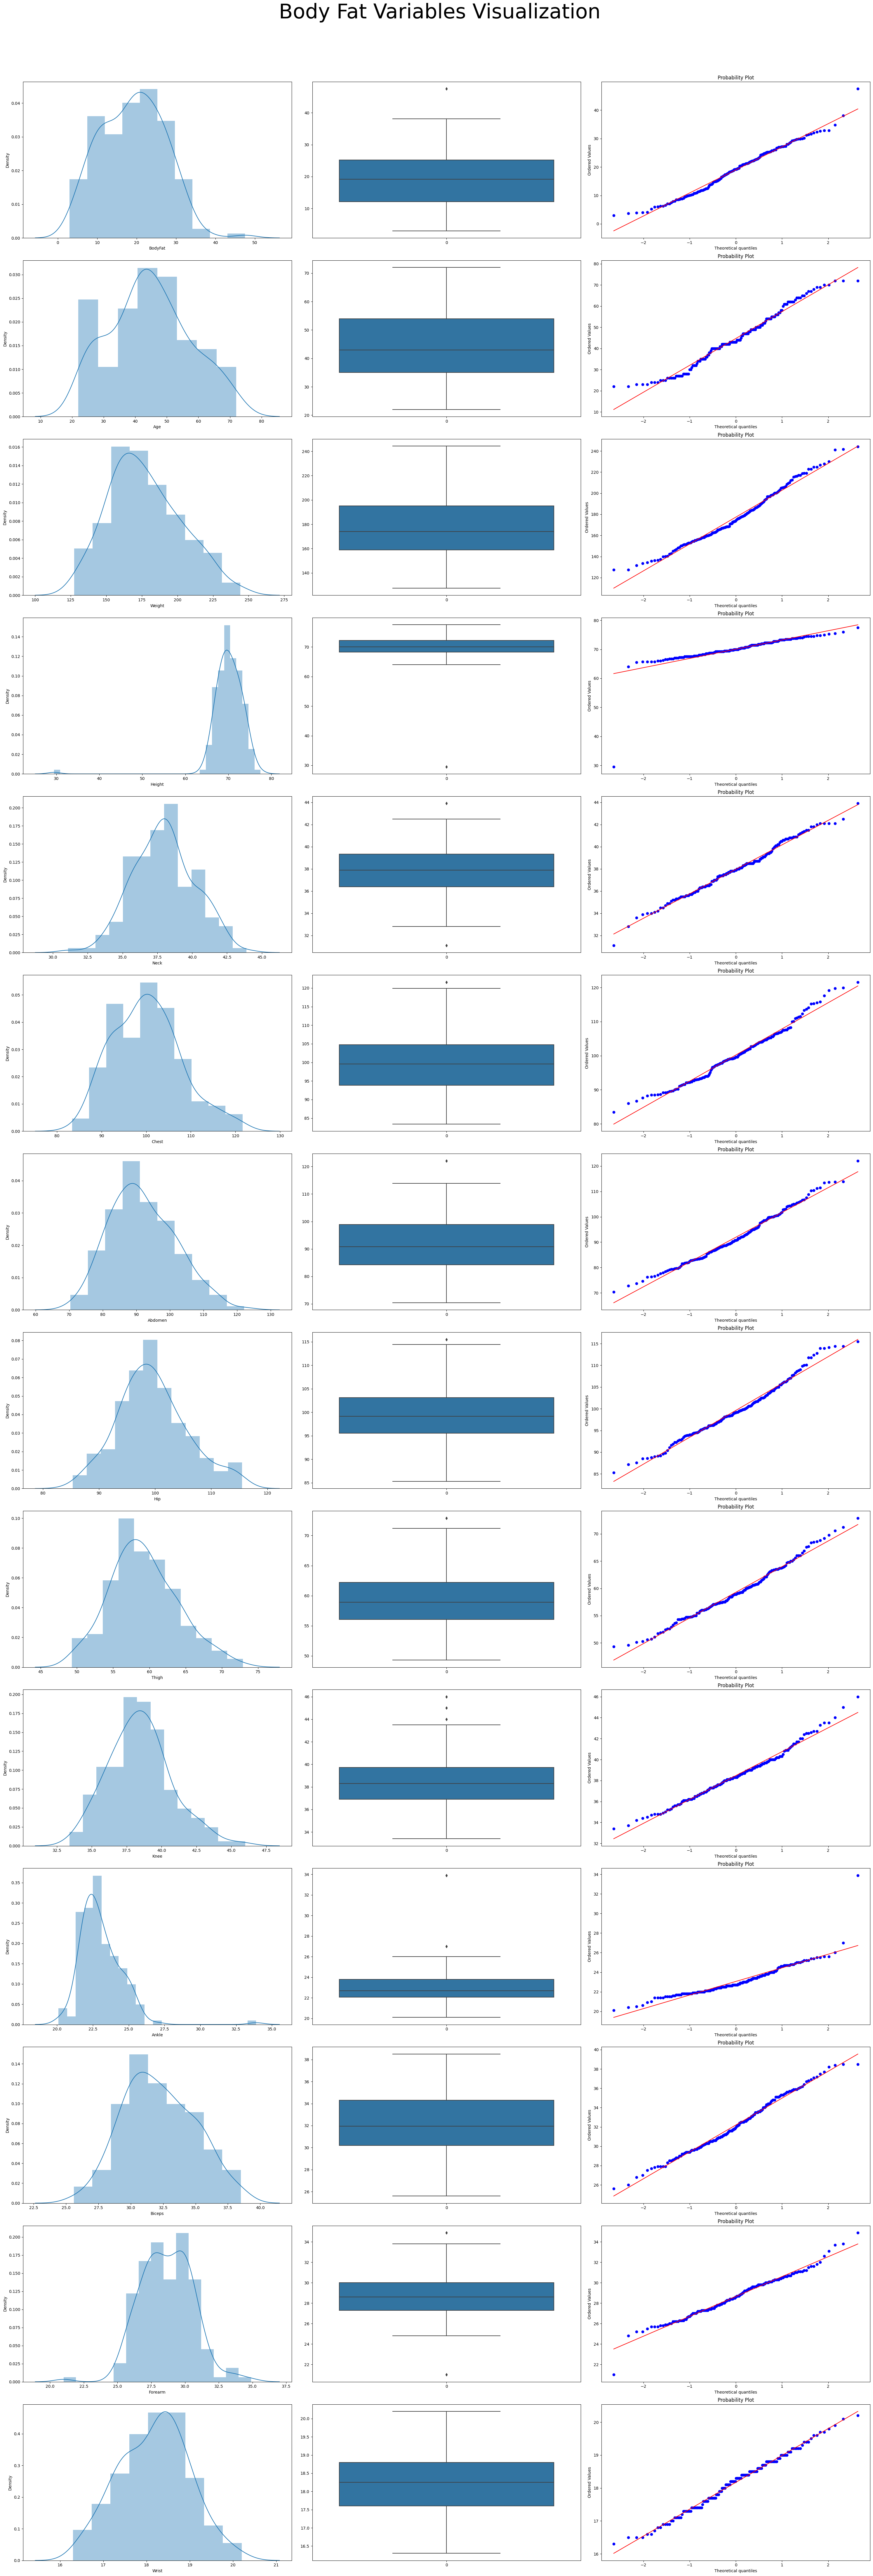

In [98]:
fig, ax = plt.subplots(14, 3, figsize=(30, 90))

for index, column in enumerate(df.columns):
    sns.distplot(df[column], ax = ax[index, 0])
    sns.boxplot(df[column], ax = ax[index, 1])
    stats.probplot(df[column], plot = ax[index, 2])

fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle(" Body Fat Variables Visualization", fontsize = 50)
plt.show()

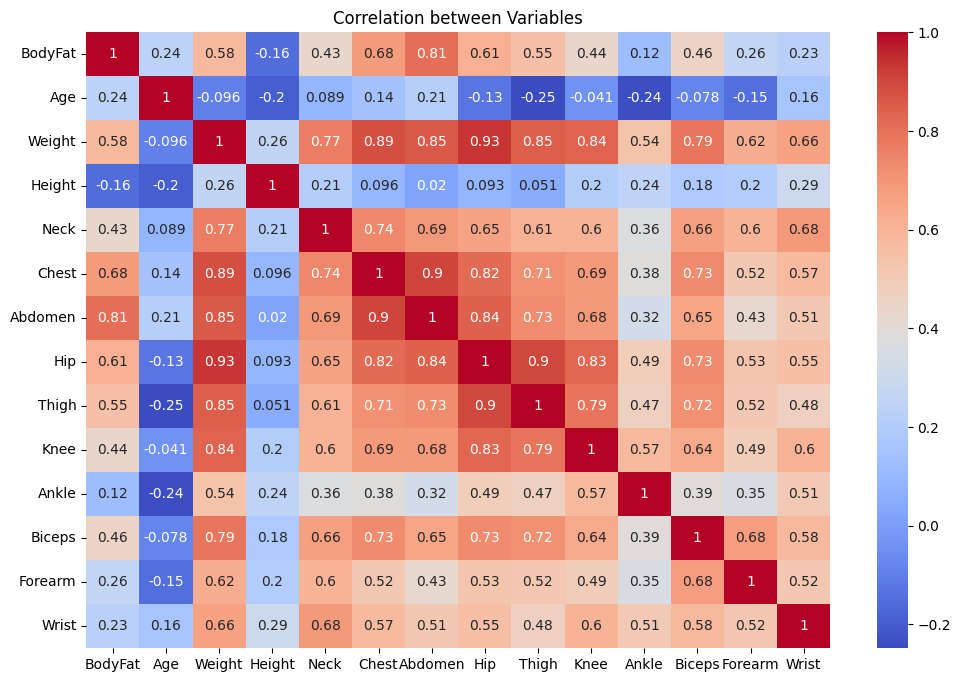

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Variables")
plt.show()

In [100]:
val_df = pd.read_csv('bodyfat-validate.csv')
val_df = val_df.drop(['Id'], axis=1,)
val_df.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,55,154.75,71.50,36.9,95.4,86.6,91.8,54.3,35.4,21.5,32.8,27.4,18.7
1,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
2,57,182.25,71.75,39.4,103.4,96.7,100.7,59.3,38.6,22.8,31.8,29.1,19.0
3,33,196.00,73.00,38.5,103.8,95.6,105.1,61.4,40.6,25.0,31.3,29.2,19.1
4,44,179.75,69.50,39.2,101.9,93.2,100.6,58.9,39.7,23.1,31.4,28.4,18.8


In [101]:
X = df.drop(['BodyFat'], axis=1)
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
lasso_reg = Lasso(alpha=0.1)

In [103]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [104]:
y_pred = lasso_reg.predict(X_test)

In [105]:
lasso_reg_mse = mean_squared_error(y_test, y_pred)
lasso_reg_rmse = np.sqrt(lasso_reg_mse)
lasso_reg_rmse

4.3578265789774

In [106]:
y_pred_val = lasso_reg.predict(val_df)
pd.DataFrame(y_pred_val).head()

,0
0,15.016479
1,27.600512
2,21.769845
3,19.496382
4,18.649066
